In [138]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [136]:
from sklearn.datasets import load_boston
boston = load_boston()

In [137]:
type(boston)

sklearn.utils.Bunch

In [197]:
dados = pd.read_csv('salarios.csv')
dados = dados.rename(columns = {'Name':'Nome','Employee Annual Salary':'Salario','Position Title':'Cargo'})
dados['Salario'] = dados.Salario.str.replace('$','')
dados['Salario'] = pd.to_numeric(dados['Salario'],errors='coerce')
dados.drop(dados.tail(1).index,inplace=True)
dados = dados.sort_values(by='Salario', ascending = False)
dados = dados[0:10]
dados

,Nome,Cargo,Department,Salario
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004.0
7980,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210.0
25622,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728.0
31711,"WYSINGER, ALFONZA",FIRST DEPUTY SUPERINTENDENT,POLICE,197736.0
27669,"STEWART III, CHARLES",FIRST DEPUTY FIRE COMMISSIONER,FIRE,197736.0
29025,"TRACY, ROBERT J",CHIEF,POLICE,194256.0
18601,"MC NICHOLAS, JOHN",DEPUTY FIRE COMMISSIONER,FIRE,187680.0
8944,"FORD II, RICHARD C",DEPUTY FIRE COMMISSIONER,FIRE,187680.0
29577,"VASQUEZ, ANTHONY P",DEPUTY FIRE COMMISSIONER,FIRE,187680.0
3702,"CALLAHAN, MICHAEL E",DEPUTY FIRE COMMISSIONER,FIRE,187680.0


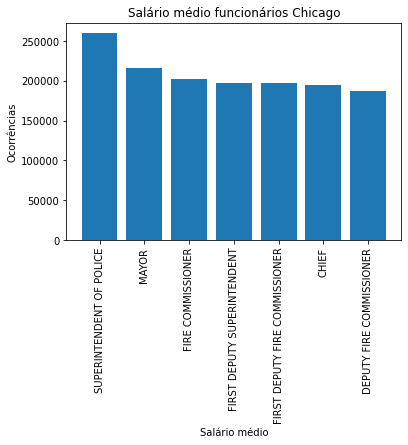

<Figure size 1440x720 with 0 Axes>

True

In [219]:
plt.bar(dados['Cargo'],dados['Salario'])
plt.ylabel('Ocorrências')
plt.xlabel('Salário médio')
plt.xticks(rotation=90)
plt.title('Salário médio funcionários Chicago')
plt.figure(figsize=(20,10))
plt.savefig('Grafico.png')

plt.show()
dados = dados.sort_values(by='Salario', ascending = False)
dados = 
dados

In [222]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [223]:
df = pd.DataFrame(boston.data)

In [224]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [225]:
df.columns = boston.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [226]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [275]:
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [278]:
X = df.drop(['PRICE'],axis=1)
Y = df.PRICE

In [279]:
regr = LinearRegression()

In [280]:
regr.fit(X, Y)

LinearRegression()

In [281]:
print(len(regr.coef_))
print(regr.intercept_)

13
36.45948838509015


In [298]:
mse1 = int(np.mean((df.PRICE - regr.predict(X)) ** 2))
print("Taxa de erro: %s"%(mse1),"%")

Taxa de erro: 21 %


In [301]:
X_treino = df[:-50]
X_teste = df[-50:]

Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

In [303]:
X_teste.shape

(50, 14)

In [304]:
from sklearn.model_selection import train_test_split

In [306]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,df.price, test_size=0.30, random_state = 5)

In [307]:
regr.fit(X_treino,Y_treino)

LinearRegression()

In [ ]:
regr.predict(X)

In [309]:
import numpy as np

In [332]:
# QUESTÃO 1 - Crie um array NumPy com 1000000 e uma lista com 1000000.
# Multiplique cada elemento do array e da lista por 2 e calcule o tempo de execução com cada um dos objetos (use %time).
# Qual objeto oferece melhor performance, array NumPy ou lista?

Dados = np.arange(0,100000)
dados = list(range(100000))

def array():
    for mult in Dados:
        mult*2
    %time
def lista():
    for multi in dados:
        multi*2
    %time

In [335]:
array()

Wall time: 0 ns


In [334]:
lista()

Wall time: 0 ns


Wall time: 0 ns
